# Laboratory 2

In this assignment you are going to build your own Bayes classifier and compare it to various naive bayes classifiers from the SciKit-Learn package.

---

В данной лабораторной работе вы построите собственный байесовский классификатор и проведёте сравнение с уже готовыми байесовскими классификаторами из библиотеки SciKit-Learn.

# Introduction

---

# Введение

In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Create dataset (Gaussian clouds)

---

## Создание датасета (гауссовы облака)

In [2]:
N = 300
noise = np.random.randn(N, 2)
cloud1 = noise + np.array([2, 2])
cloud2 = noise + np.array([-2, -2])
cloud3 = noise + np.array([-2, 2])
cloud4 = noise + np.array([2, -2])

In [3]:
data = np.vstack([cloud1, cloud2, cloud3, cloud4])

In [4]:
annotation1 = [0]*N
annotation2 = [1]*N
annotation3 = [2]*N
annotation4 = [3]*N
annotations = annotation1 + annotation2 + annotation3 + annotation4

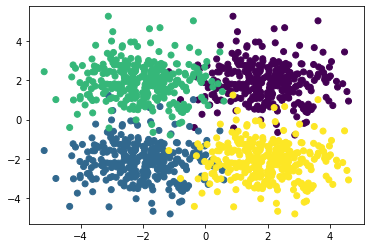

In [5]:
plt.scatter(data[:,0], data[:,1], c=annotations)

Before training a model the dataset must be split into validation set and training set. Validation set is used for testing the model during training and tuning hyperparameters, training set is used for trainng the model. Usually validation set is 25% of all the data (75% is training set, 25% is validation set).

---

Перед обучением модели необходимо разделить весь датасет на валидационную выборку и обучающую выборку. Валидационная выборка используется для тестирования модели по ходу обучения и подбора гиперпараметров, обучающая - для обучения. Обычно валидационная выборка составляет 25% от всех данных.

In [6]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.25)

In [7]:
Xtrain.shape, Xtest.shape

((900, 2), (300, 2))

In [8]:
len(Ytrain), len(Ytest)

(900, 300)

## Create Gaussian Naive Bayes Classifier

---

## Создание нового наивного классификатора Байеса

In [9]:
# All models in SciKit-Learn have the same interface.
# So it is sufficient to only change the class, all the training and prediction code remains the same.
# Change the model and see how it performs on the data.
# ---
# Все модели в SciKit-Learn имеют один и тот же интерфейс.
# Поэтому достаточно изменить лишь класс, код обучения и получения ответов модели остаётся таким же.
# Попробуйте выбрать другую модель и посмотрите, как она работает на этих данных.
model = GaussianNB()

In [10]:
model.fit(Xtrain, Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
pred = model.predict(Xtest)

In [12]:
def evaluate(P, T):
    # P - predictions
    # T - targets
    # accuracy = correct predictions / all predictions
    # ---
    # P - предсказания
    # T - метки
    # точность = (количество корректных предсказаний) / (количество всех предсказаний)
    accuracy = np.mean(P == T)
    print(accuracy*100, '%')

In [13]:
evaluate(model.predict(Xtest), Ytest)

91.0 %


In [14]:
# (i, j) elements stands for number of samples of class `i` classified as class `j`
# i - row
# j - column
# ---
# (i, j) элемент означает количество экземпляров класса i, присвоенных к классу j
# i - строка
# j - колонка
conf_mat = confusion_matrix(Ytest, pred)
conf_mat

array([[71,  0,  5,  4],
       [ 0, 72,  1,  6],
       [ 2,  3, 65,  0],
       [ 3,  3,  0, 65]])

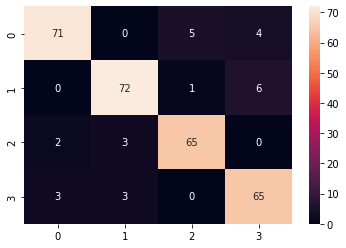

In [15]:
# Visualized confusion matrix
# ---
# Визуализация матрицы ошибок
sns.heatmap(conf_mat, annot=True)

# Task

Develop your own Bayes classifier implementation and compare it to the SciKit-Learn ones: Gaussian Naive Bayes, Multinomial Naive Bayes, Complement Naive Bayes, Bernoulli Naive Bayes. Use the data obtained in the first lab to train the classifiers.

Measure performance of the classifiers - time spent on classifying a single data sample (data point) - and compare performance of your classifier to those of SciKit-Learn.
Measure accuracy of the classifiers and compare accuracy of your classifier to those of SciKit-Learn. 


Upon the completion of the assignement the following must be done (points 1-4 are required to be completed):
1. make confusion matrices for every classifier;
2. determine which classifier is the most accurate;
3. draw histograms of performance for every classifier on a single graph;
4. determine which classifier's performance is the most stable. Use variance of classification time (time spent for classifying a single data sample) as a criteria;
5. *additional score assignment*: find a better criteria of performance stability and use it analogously to point 4. Explain why the criteria is better than the variance.

All of the corresponding information (points 1-4 and 5 if completed) must be displayed as a result of the program execution.

Sci-Kit Learn Naive Bayes documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

---

Разработайте собственную реализацию байесовского классификатора и сравните её с классификаторами из SciKit-Learn: Gaussian Naive Bayes, Multinomial Naive Bayes, Complement Naive Bayes, Bernoulli Naive Bayes. При обучении классификаторов использовать набор данных, полученный при выполнении лабораторной работы 1.

Замерьте прозводительность классификаторов - время, затраченное на классификацию одного экземпляра данных (одна точка) - и сравните производительность разработанного вами классификатора с классификаторами SciKit-Learn.
Замерьте точность классификаторов и сравните точность разработанного вами классификатора с классификаторами SciKit-Learn.

По завершению выполнения работы необходимо (первые 4 пункта обязательны для выполнения):
1. построить матрицы ошибок для каждого классификатора;
2. определить классификатор, имеющий наибольшую точность;
3. построить гистограммы производительности для всех классификаторов, разместив их на одном графике;
4. определить классификатор с наиболее стабильной производительностью. В качестве критерия стабильности использовать дисперсию времени, затраченного на классификацию одного экземпляра данных (одна точка);
5. *задание на дополнительные баллы:* найти более достоверный критерий оценки стабильности производительности и использовать его по аналогии с пунктом 4. Обосновать, почему он является более достоверным.

Соответствующие пункты задания (1-4 и 5, если выполнен) должны быть выведены в результате работы программы.

Документация байесовских классификаторов SciKit-Learn: https://scikit-learn.org/stable/modules/naive_bayes.html


Use variants (datasets) from the first lab.

---

Используете варианты (наборы данных) из первой лабораторной работы.